In [1]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pdf
import numpy as np
import pandas as pd
# import scipy.stats
import colors as EL

%matplotlib inline
savename = './figures/Fig2.pdf'

In [2]:
df = pd.read_csv('./data/trajectories/cleaned_animal_analyses_acclimation.csv')
df = df[df['dead'] != 'yes']
assert len(df) == len(df["animal_ID"].unique()), "Animal IDs are not unique!"
display(df.columns)

Index(['animal_ID', 'treatment_odor', 'sex', 'species', 'dead', 'length_mm',
       'time_move_p', 'total_dist_m', 'avg_speed_BL', 'max_speed_BL',
       'mean_speed_first_BL', 'diff_speed_first_last_BL', 'sharp_turns_p',
       'spirals', 'continuous', 'max_still_sec'],
      dtype='object')

In [3]:
# Split dataframe by species

aegypti = df[df['species'].str.upper() == 'AEDES AEGYPTI'].copy()
albopictus = df[df['species'].str.upper() == 'AEDES ALBOPICTUS'].copy()
arabiensis = df[df['species'].str.upper() == 'ANOPHELES ARABIENSIS'].copy()
coluzzii = df[df['species'].str.upper() == 'ANOPHELES GAMBIAE'].copy()
quinque = df[df['species'].str.upper() == 'CULEX QUINQUEFASCIATUS'].copy()
tarsalis = df[df['species'].str.upper() == 'CULEX TARSALIS'].copy()

display(tarsalis.sample(5))

,animal_ID,treatment_odor,sex,species,dead,length_mm,time_move_p,total_dist_m,avg_speed_BL,max_speed_BL,mean_speed_first_BL,diff_speed_first_last_BL,sharp_turns_p,spirals,continuous,max_still_sec
477,191127-03-bottom,100ul_quinine,f,Culex tarsalis,no,4.7,59.065628,1.202527,0.451535,3.753082,0.351052,0.081940,0.556174,19,131,121.5
456,191126-04-bottom,100ul_milliQ_water,m,Culex tarsalis,no,4.5,0.222346,0.114775,0.593152,0.779869,0.061194,-0.038408,0.000000,0,0,891.0
459,191126-06-top,100ul_milliQ_water,f,Culex tarsalis,no,3.9,73.818788,2.262915,0.852146,3.123482,0.718648,0.160741,1.556420,10,65,143.0
464,191126-08-bottom,100ul_milliQ_water,f,Culex tarsalis,no,4.6,37.409672,1.054768,0.617647,2.479032,0.195711,-0.144219,0.722624,6,34,130.5
474,191127-01-top,100ul_quinine,f,Culex tarsalis,no,3.2,54.261838,1.798122,1.071439,7.223327,0.547114,0.063539,2.562674,6,136,36.0


In [10]:
print('aedes aegypti')
display(aegypti.describe())
print('aedes albopictus')
display(albopictus.describe())

print('culex q.')
display(quinque.describe())
print('culex tarsalis')
display(tarsalis.describe())

print('anopheles arabiensis')
display(arabiensis.describe())
print('anopheles coluzzii')
display(coluzzii.describe())

aedes aegypti


,length_mm,time_move_p,total_dist_m,avg_speed_BL,max_speed_BL,mean_speed_first_BL,diff_speed_first_last_BL,sharp_turns_p,spirals,continuous,max_still_sec
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,5.334286,55.520818,2.274328,0.770719,2.846579,0.436781,0.031258,6.736922,4.742857,139.371429,65.242857
std,0.481208,19.078745,1.191903,0.241007,1.649604,0.230181,0.320164,2.937391,5.643223,53.590279,107.754476
min,4.300000,0.389321,0.108943,0.242576,0.270123,0.019362,-0.626144,0.000000,0.000000,0.000000,0.000000
25%,5.000000,48.108576,1.644773,0.623333,2.072345,0.299301,-0.137482,4.755284,1.000000,117.250000,18.000000
50%,5.300000,59.705228,2.153676,0.703994,2.490671,0.437037,-0.037355,6.840934,3.000000,140.000000,28.750000
75%,5.575000,68.661139,2.780551,0.874285,3.219911,0.605515,0.166246,8.549985,5.750000,170.000000,55.875000
max,6.700000,85.579065,6.016811,1.519400,14.657633,1.041106,1.215944,14.524207,26.000000,264.000000,549.000000


aedes albopictus


,length_mm,time_move_p,total_dist_m,avg_speed_BL,max_speed_BL,mean_speed_first_BL,diff_speed_first_last_BL,sharp_turns_p,spirals,continuous,max_still_sec
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,5.026761,51.849446,1.761141,0.678340,2.193253,0.221133,0.264908,4.334241,4.732394,125.760563,69.507042
std,0.493951,16.631675,0.683605,0.156423,0.710025,0.182782,0.234494,2.420877,5.204278,48.585555,70.843867
min,4.000000,3.670745,0.196033,0.419113,1.003215,0.000000,-0.263964,0.111235,0.000000,3.000000,0.000000
25%,4.700000,46.594372,1.371188,0.570833,1.734832,0.080313,0.087415,2.641824,0.500000,100.000000,30.750000
50%,5.100000,56.562848,1.725588,0.655833,2.035777,0.154126,0.266264,4.171301,2.000000,134.000000,49.500000
75%,5.300000,63.358259,2.171286,0.751029,2.444748,0.358575,0.418223,5.450501,7.000000,154.000000,80.000000
max,6.300000,77.030033,3.588899,1.296989,5.490232,0.672587,0.805172,11.902113,22.000000,230.000000,432.500000


culex q.


,length_mm,time_move_p,total_dist_m,avg_speed_BL,max_speed_BL,mean_speed_first_BL,diff_speed_first_last_BL,sharp_turns_p,spirals,continuous,max_still_sec
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,4.954545,35.444990,2.368597,1.292290,5.508612,0.664396,-0.229054,4.965118,3.381818,105.563636,88.300000
std,0.476924,12.736622,1.262181,0.518791,1.979010,0.430830,0.490531,2.975304,4.212219,42.300699,128.564466
min,3.900000,1.557286,0.180415,0.282705,0.609893,0.000634,-1.422460,0.000000,0.000000,4.000000,11.500000
25%,4.600000,27.106949,1.325090,0.920923,4.804013,0.334015,-0.565885,2.209885,0.000000,72.500000,22.500000
50%,4.900000,37.447899,2.482666,1.406421,5.618544,0.558108,-0.197057,5.560189,2.000000,113.500000,31.250000
75%,5.275000,43.909894,3.368566,1.656350,6.367076,1.071703,0.131867,7.662350,5.000000,137.750000,83.875000
max,6.100000,63.904338,5.158601,2.407623,12.879172,1.471239,0.828960,9.632517,17.000000,189.000000,657.500000


culex tarsalis


,length_mm,time_move_p,total_dist_m,avg_speed_BL,max_speed_BL,mean_speed_first_BL,diff_speed_first_last_BL,sharp_turns_p,spirals,continuous,max_still_sec
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,4.543396,45.660347,1.451444,0.725991,3.982134,0.323982,0.096332,2.059689,13.132075,72.283019,138.613208
std,0.543319,19.661839,0.584420,0.179588,2.983562,0.240482,0.294399,2.760644,8.698005,33.259109,143.906207
min,3.200000,0.222346,0.114775,0.360515,0.573524,0.034269,-0.483655,0.000000,0.000000,0.000000,11.500000
25%,4.200000,29.794330,1.090649,0.617397,2.747882,0.132167,-0.087359,0.889383,7.000000,54.000000,48.000000
50%,4.600000,45.717464,1.423010,0.726324,3.798235,0.250424,0.081940,1.446051,12.000000,69.000000,110.000000
75%,4.900000,57.452725,1.842490,0.838734,4.436467,0.414039,0.268246,2.501390,19.000000,84.000000,168.000000
max,5.500000,96.436526,2.998456,1.109133,23.011840,0.940795,0.883902,18.885794,48.000000,177.000000,891.000000


anopheles arabiensis


,length_mm,time_move_p,total_dist_m,avg_speed_BL,max_speed_BL,mean_speed_first_BL,diff_speed_first_last_BL,sharp_turns_p,spirals,continuous,max_still_sec
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,4.531183,8.932754,0.628666,1.283705,4.697824,0.322074,-0.161061,1.532277,0.150538,28.860215,355.462366
std,0.446965,8.706884,0.572852,0.477781,2.383639,0.383386,0.428628,1.710811,0.388594,28.952582,225.631773
min,3.600000,0.000000,0.000918,0.000000,0.054599,0.000000,-2.375918,0.000000,0.000000,0.000000,74.000000
25%,4.200000,1.946607,0.222770,1.033511,3.553623,0.056286,-0.324918,0.222469,0.000000,6.000000,183.000000
50%,4.600000,6.674082,0.436854,1.317145,4.792032,0.252043,-0.090133,0.947075,0.000000,21.000000,276.500000
75%,4.900000,13.967724,0.898117,1.536388,5.539546,0.422653,0.030810,2.167871,0.000000,45.000000,484.500000
max,5.400000,37.652948,3.028177,3.012184,20.859971,2.411475,0.590477,7.341491,2.000000,141.000000,899.500000


anopheles coluzzii


,length_mm,time_move_p,total_dist_m,avg_speed_BL,max_speed_BL,mean_speed_first_BL,diff_speed_first_last_BL,sharp_turns_p,spirals,continuous,max_still_sec
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,4.558333,12.925359,1.298661,1.886515,7.732316,1.039285,-0.875270,2.776994,0.388889,42.296296,258.587963
std,0.489158,9.003710,1.001073,0.670385,2.505451,0.740305,0.736103,2.280851,0.734126,28.241369,165.513402
min,3.600000,0.667408,0.125781,0.290457,0.585080,0.000000,-2.342005,0.000000,0.000000,1.000000,27.500000
25%,4.300000,5.698390,0.492547,1.355888,5.829415,0.375156,-1.482901,1.042246,0.000000,20.750000,138.000000
50%,4.600000,10.870194,1.123501,1.954261,7.971902,0.987710,-0.805843,2.001684,0.000000,37.000000,241.750000
75%,4.825000,18.460158,1.897243,2.432982,9.431741,1.659094,-0.266378,4.198515,1.000000,60.000000,329.125000
max,6.800000,34.908282,4.128157,3.096430,13.411688,2.503891,0.745213,8.949416,3.000000,116.000000,870.500000


In [5]:
def plot_values(fig, ax, value, ylim):
    
    aegypti_v = aegypti[value].tolist()
    albopictus_v = albopictus[value].tolist()
    arabiensis_v = arabiensis[value].tolist()
    coluzzii_v = coluzzii[value].tolist()
    tarsalis_v = tarsalis[value].tolist()
    quinque_v = quinque[value].tolist()
    
    check = aegypti_v + albopictus_v + arabiensis_v + coluzzii_v + tarsalis_v + quinque_v
    print('Min:', min(check), 'Max:', max(check))
    
    aegypti_v = [x for x in aegypti_v if str(x) != 'nan']
    albopictus_v = [x for x in albopictus_v if str(x) != 'nan']
    arabiensis_v = [x for x in arabiensis_v if str(x) != 'nan']
    coluzzii_v = [x for x in coluzzii_v if str(x) != 'nan']
    tarsalis_v = [x for x in tarsalis_v if str(x) != 'nan']
    quinque_v = [x for x in quinque_v if str(x) != 'nan']
    
    if len(tarsalis_v) == 0:
        tarsalis_v = [0]
    
    data = [aegypti_v, albopictus_v, arabiensis_v, coluzzii_v, quinque_v, tarsalis_v]
    parts = ax.violinplot(data, showmeans=False, showmedians=False, showextrema=False)
    jitter = [np.random.normal(scale=0.1, size=len(aegypti_v)), 
              np.random.normal(scale=0.1, size=len(albopictus_v)), 
              np.random.normal(scale=0.1, size=len(arabiensis_v)),
              np.random.normal(scale=0.1, size=len(coluzzii_v)),
              np.random.normal(scale=0.1, size=len(quinque_v)),
              np.random.normal(scale=0.1, size=len(tarsalis_v))]

    colors = [EL.aegypti, EL.albopictus, EL.arabiensis, EL.coluzzii, 
              EL.culex_q, EL.culex_t]
    markers = [EL.aegypti_marker, EL.albopictus_marker, 
               EL.arabiensis_marker, EL.coluzzii_marker,
               EL.culex_q_marker, EL.culex_t_marker]
    markersizes = [EL.aegypti_markersize, EL.albopictus_markersize, 
               EL.arabiensis_markersize, EL.coluzzii_markersize,
               EL.culex_q_markersize, EL.culex_t_markersize]

    for i, pc in enumerate(parts['bodies']):
        pc.set_facecolor(colors[i])
        pc.set_alpha(0.25)

    for i, (j, d) in enumerate(zip(jitter, data)):
        j = [x+i+1 for x in j]
        ax.scatter(j, d, alpha=0.75, color=colors[i], zorder=5, s=4, 
                     marker='o', clip_on=False, lw=0)
    
    ax.set_ylim(ylim[0], ylim[-1])
    ax.set_yticks(ylim)
    ax.set_yticklabels(ylim)
    
    # Color the x axis labels by species
    ax.set_xlim(0.25, 6+0.75)
    ax.set_xticks([])
    
    # Add a black bar for the mean of each dataset
    ch = 0.15
    for i, datum in enumerate(data):
            ax.plot([i+1-ch, i+1+ch], [np.mean(datum)]*2, color="k", 
                    alpha=0.75, lw=2, zorder=20, clip_on=False, solid_capstyle='round')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    return fig, ax

Min: 0.0 Max: 96.43652561247215
Min: 0.0009182241465714293 Max: 6.016811115849045
Min: 0.0 Max: 3.0964303282767314
Min: 0.0545990508483007 Max: 23.01184008442087
Min: 0.0 Max: 2.503891319533021
Min: -2.3759180904313197 Max: 1.2159444932331156
Min: 0.0 Max: 18.885793871866298
Min: 0.0 Max: 899.5
Min: 0 Max: 48
Min: 0 Max: 264


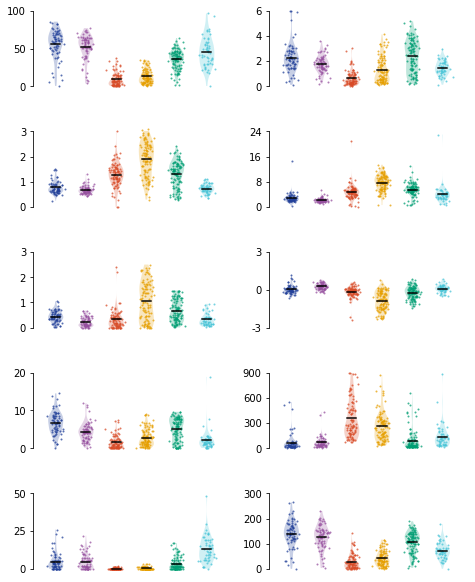

In [6]:
fig = plt.figure(figsize = (6, 7.75))
ax1 = fig.add_subplot(5, 2, 1)
ax2 = fig.add_subplot(5, 2, 2)
ax3 = fig.add_subplot(5, 2, 3)
ax4 = fig.add_subplot(5, 2, 4)
ax5 = fig.add_subplot(5, 2, 5)
ax6 = fig.add_subplot(5, 2, 6)
ax7 = fig.add_subplot(5, 2, 7)
ax8 = fig.add_subplot(5, 2, 8)
ax9 = fig.add_subplot(5, 2, 9)
ax10 = fig.add_subplot(5, 2, 10)

fig, ax1 = plot_values(fig, ax1, 'time_move_p', ylim=np.arange(0, 101, 50))
fig, ax2 = plot_values(fig, ax2, 'total_dist_m', ylim=np.arange(0, 7, 2))
fig, ax3 = plot_values(fig, ax3, 'avg_speed_BL', ylim=np.arange(0, 4, 1))
fig, ax4 = plot_values(fig, ax4, 'max_speed_BL', ylim=np.arange(0, 25, 8))
fig, ax5 = plot_values(fig, ax5, 'mean_speed_first_BL', ylim=np.arange(0, 4, 1))
fig, ax6 = plot_values(fig, ax6, 'diff_speed_first_last_BL', ylim=np.arange(-3, 4, 3))
fig, ax7 = plot_values(fig, ax7, 'sharp_turns_p', ylim=np.arange(0, 21, 10))
fig, ax8 = plot_values(fig, ax8, 'max_still_sec', ylim=np.arange(0, 901, 300))
fig, ax9 = plot_values(fig, ax9, 'spirals', ylim=np.arange(0, 51, 25))
fig, ax10 = plot_values(fig, ax10, 'continuous', ylim=np.arange(0, 301, 100))

# Remove padding and margins from the figure and all its subplots
plt.margins(0,0)
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0.6, wspace=0.2)
plt.show()

# Save the Matplotlib figure as a PDF file:
pp = pdf.PdfPages(savename, keep_empty=False)
pp.savefig(fig)
pp.close()